In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn import tree 


# Load and Visualize the Dataset

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64


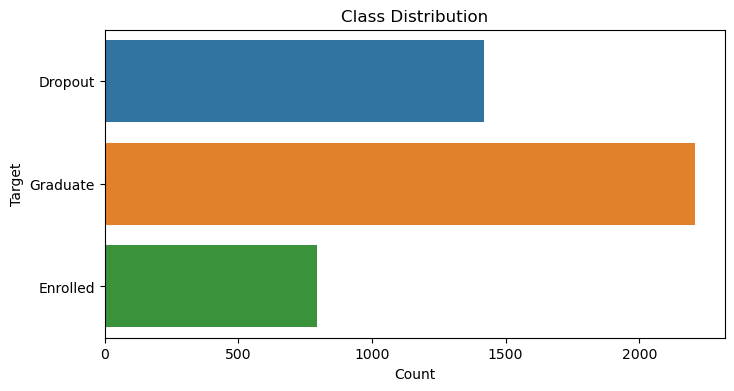

In [4]:
# Load and Visualize the dataset on a pandas dataframe
dataframex = pd.read_csv('C:/Users/ELITEBOOK 840 G6/Desktop/student_performance_data.csv')
dataframex
# Check the class distribution
print(dataframex['Target'].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(y='Target', data=dataframex)
plt.title('Class Distribution')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

In [ ]:
print(dataframex.dtypes)
dataframex.head()

# Data Preprocessing

In [5]:

# Step 1: Handling missing values

# Check the number of missing values in each column
missing_values = dataframex.isnull().sum()

# Print the number of missing values
print(missing_values)

 # Drop rows with missing values
dataframey = dataframex.dropna() 

# Step 2: Handling outliers (unexplainable outliers)

# You can use various techniques like z-score, IQR, or other domain-specific methods to detect and remove outliers.

# Calculate the absolute Z-score for each data point
z_scores = np.abs((dataframey - dataframey.mean()) / dataframey.std())

# Set a threshold for the Z-score to identify outliers (e.g., 3 standard deviations)
threshold = 3

# Create a Boolean mask to identify outliers
outlier_mask = z_scores > threshold

# Remove outliers from the dataset
dataframe_no_outliers = dataframey[~outlier_mask.any(axis=1)]

# Print the number of removed outliers
num_outliers_removed = len(dataframey) - len(dataframe_no_outliers)
print(f"Number of outliers removed: {num_outliers_removed}")

# Step 3: Handling class imbalance
from imblearn.over_sampling import SMOTE

# Separate the features (X) and target variable (y)
X = dataframe_no_outliers.drop('Target', axis=1)  # Adjust the column name for the target variable
y = dataframe_no_outliers['Target']  # Adjust the column name for the target variable

# Apply SMOTE to balance the classes
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Apply feature selection using PCA
pca = PCA(n_components=10) # I chose 10 components for my dataset
X_pca = pca.fit_transform(X_resampled)



Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               1
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

C:\Users\ELITEBOOK 840 G6\AppData\Local\Temp\ipykernel_2508\1884361985.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((dataframey - dataframey.mean()) / dataframey.std())


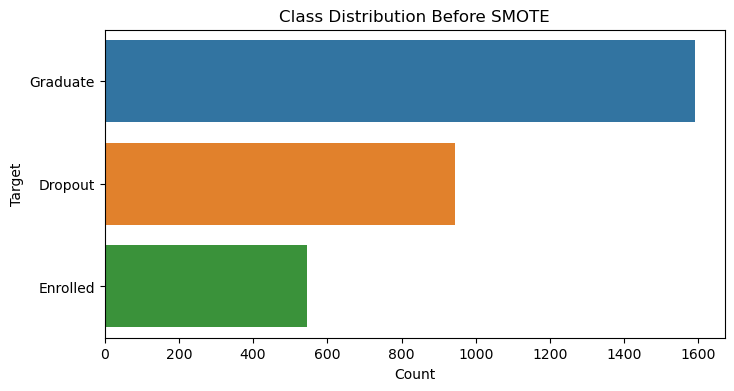

C:\Users\ELITEBOOK 840 G6\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


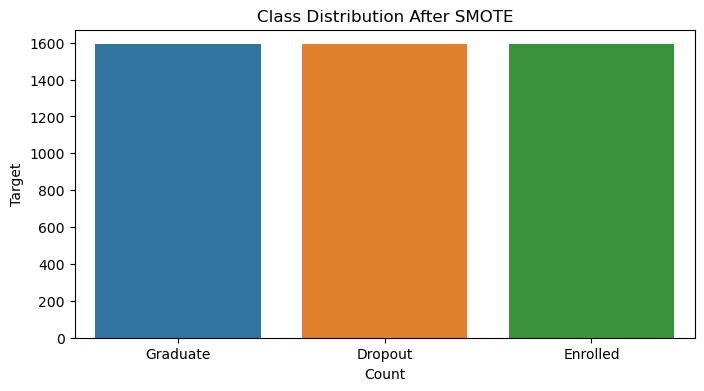

In [13]:
# Visualizing the class distribution before and after oversampling
import matplotlib.pyplot as plt
import seaborn as sns

# Before SMOTE
plt.figure(figsize=(8, 4))
sns.countplot(y='Target', data=dataframe_no_outliers)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

# After SMOTE
plt.figure(figsize=(8, 4))
sns.countplot(y_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()


# Applying The Decision Tree Classifier Model

Decision Tree Accuracy: 0.6827225130890052
Decision Tree Precision: 0.6834177172174447
Decision Tree Recall: 0.6827225130890052
Decision Tree F1 Score: 0.6828693276177505
Decision Tree Confusion Matrix: [[229  42  51]
 [ 50 196  62]
 [ 32  66 227]]


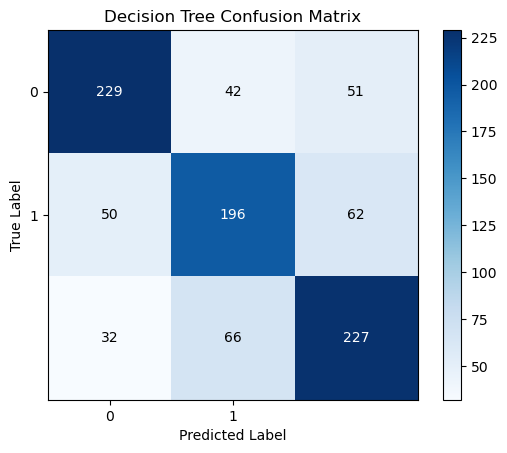

C:\Users\ELITEBOOK 840 G6\anaconda3\lib\site-packages\sklearn\tree\_export.py:677: UserWarning: Glyph 9 (	) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\Users\ELITEBOOK 840 G6\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


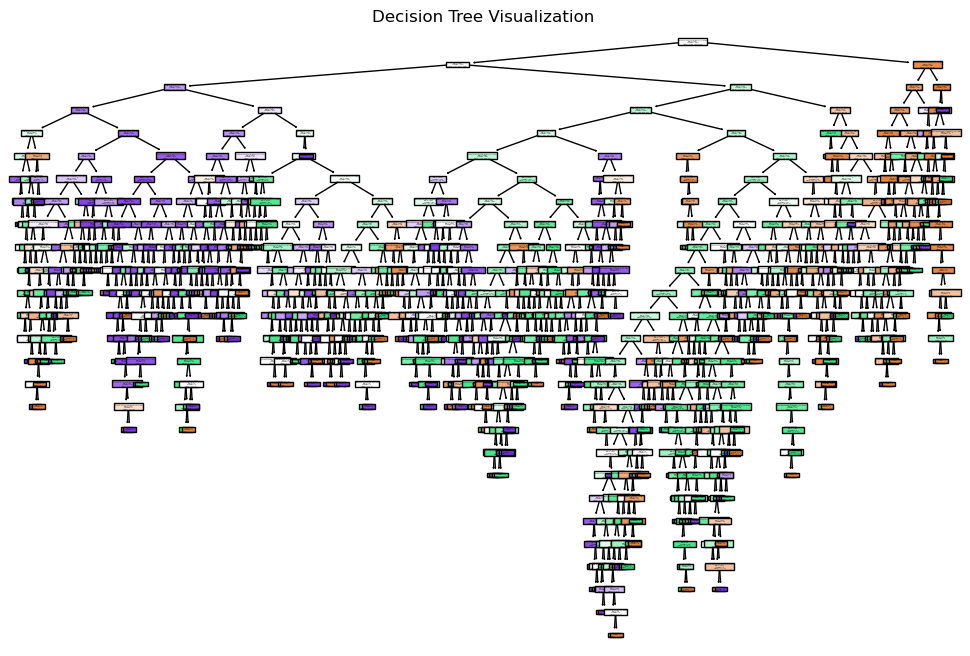

In [22]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)

# Step 6: Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Step 7: Make predictions on the dataset
y_pred = clf.predict(X_test)

# Step 8: Evaluate the decision tree model's performance
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred, average='weighted')
dt_recall = recall_score(y_test, y_pred, average='weighted')
dt_f1 = f1_score(y_test, y_pred, average='weighted')
dt_confusion_mat = confusion_matrix(y_test, y_pred)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1 Score:", dt_f1)
print("Decision Tree Confusion Matrix:",dt_confusion_mat)


# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')

plt.show()

# Plot Decision Tree Visualization
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=dataframex.columns[:-1])
plt.title('Decision Tree Visualization')
plt.show()



# Logistic Regression Model

C:\Users\ELITEBOOK 840 G6\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6209424083769634
Logistic Regression Precision: 0.6394302241137002
Logistic Regression Recall: 0.6209424083769634
Logistic Regression F1 Score: 0.6035716274148213
Logistic Regression Confusion Matrix: [[191  62  69]
 [ 45 105 158]
 [  0  28 297]]


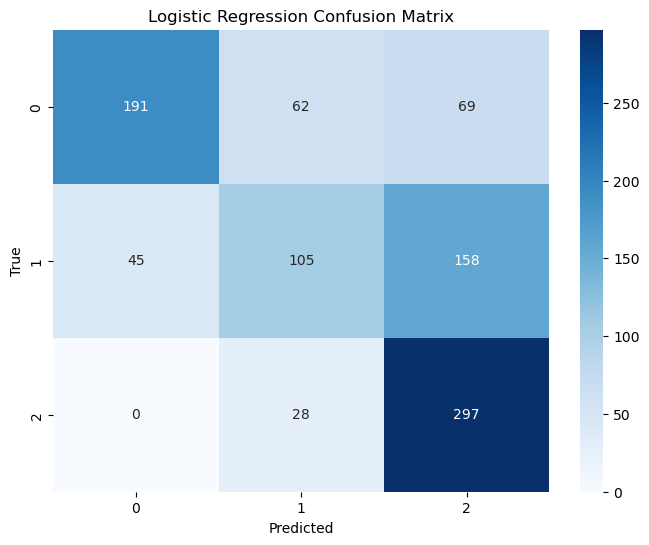

In [15]:
# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
logreg_y_pred = logreg.predict(X_test)

# Calculate evaluation metrics
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
logreg_precision = precision_score(y_test, logreg_y_pred, average='weighted')
logreg_recall = recall_score(y_test, logreg_y_pred, average='weighted')
logreg_f1 = f1_score(y_test, logreg_y_pred, average='weighted')
logreg_confusion = confusion_matrix(y_test, logreg_y_pred)


print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Precision:", logreg_precision)
print("Logistic Regression Recall:", logreg_recall)
print("Logistic Regression F1 Score:", logreg_f1)
print("Logistic Regression Confusion Matrix:",logreg_confusion)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_confusion, annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# K-Nearest Neighbours Algorithm

C:\Users\ELITEBOOK 840 G6\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy: 0.6680628272251309
KNN Precision: 0.6795641711984701
KNN Recall: 0.6680628272251309
KNN F1 Score: 0.665946016930105
KNN Confusion Matrix: [[215  63  44]
 [ 31 244  33]
 [ 46 100 179]]


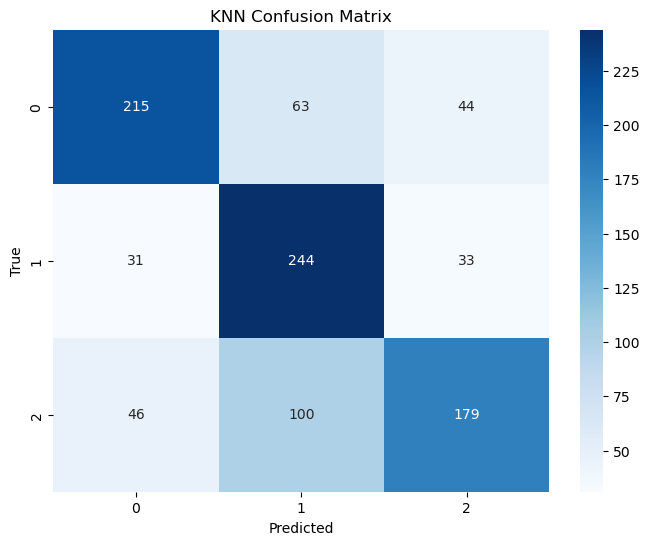

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred = knn.predict(X_test)

# Calculate evaluation metrics
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred, average='weighted')
knn_recall = recall_score(y_test, knn_y_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_y_pred, average='weighted')
knn_confusion = confusion_matrix(y_test, knn_y_pred)

print("KNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("KNN Recall:", knn_recall)
print("KNN F1 Score:", knn_f1)
print("KNN Confusion Matrix:", knn_confusion)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_confusion, annot=True, cmap='Blues', fmt='g')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Support Vector Machines Algorithm

SVM Accuracy: 0.5109947643979058
SVM Precision: 0.5485334744346663
SVM Recall: 0.5109947643979058
SVM F1 Score: 0.5134174137845098
SVM Confusion Matrix: [[175  96  51]
 [ 49 194  65]
 [ 16 190 119]]


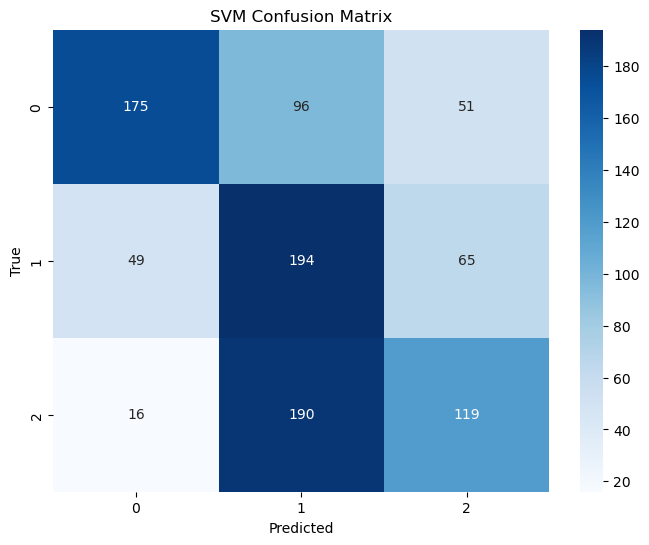

In [25]:
from sklearn.svm import SVC

# Create and fit the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
svm_y_pred = svm.predict(X_test)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred, average='weighted')
svm_recall = recall_score(y_test, svm_y_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_y_pred, average='weighted')
svm_confusion = confusion_matrix(y_test, svm_y_pred)

print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)
print("SVM Confusion Matrix:", svm_confusion)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion, annot=True, cmap='Blues', fmt='g')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Random Forest Classifier Algorithm

Random Forest Accuracy: 0.7539267015706806
Random Forest Precision: 0.7625314488950996
Random Forest Recall: 0.7539267015706806
Random Forest F1 Score: 0.7545729926462911
Random Forest Confusion Matrix: [[224  51  47]
 [ 29 236  43]
 [ 10  55 260]]


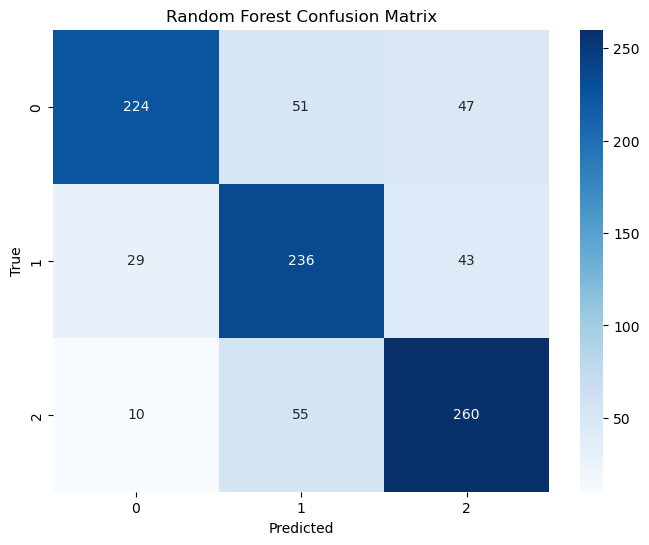

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf.predict(X_test)

# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')
rf_confusion = confusion_matrix(y_test, rf_y_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)
print("Random Forest Confusion Matrix:", rf_confusion)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# MLP Classifier Algorithm

MLP Accuracy: 0.6617801047120419
MLP Precision: 0.6601583119900664
MLP Recall: 0.6617801047120419
MLP F1 Score: 0.6575402064628516
MLP Confusion Matrix: [[229  49  44]
 [ 66 149  93]
 [  7  64 254]]


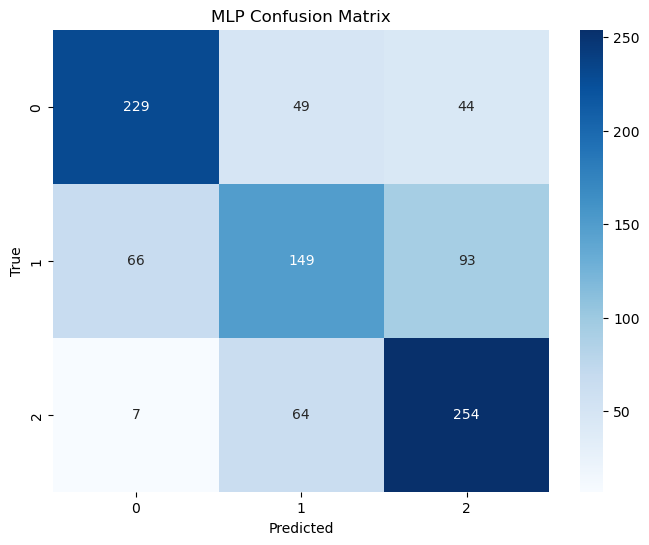

In [27]:
from sklearn.neural_network import MLPClassifier

# Create and fit the MLP model
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

# Make predictions on the test set
mlp_y_pred = mlp.predict(X_test)

# Calculate evaluation metrics
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
mlp_precision = precision_score(y_test, mlp_y_pred, average='weighted')
mlp_recall = recall_score(y_test, mlp_y_pred, average='weighted')
mlp_f1 = f1_score(y_test, mlp_y_pred, average='weighted')
mlp_confusion = confusion_matrix(y_test, mlp_y_pred)

print("MLP Accuracy:", mlp_accuracy)
print("MLP Precision:", mlp_precision)
print("MLP Recall:", mlp_recall)
print("MLP F1 Score:", mlp_f1)
print("MLP Confusion Matrix:", mlp_confusion)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_confusion, annot=True, cmap='Blues', fmt='g')
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
